# **IMPORTAR LIBRERÍAS**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder


# **CARGAR EL DATASET**

In [3]:
#Dataset de Kaggle
df = pd.read_csv('/content/Clean_Dataset.csv')
df.head()
df


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df = df.dropna()

train_df, test_df = train_test_split(df, test_size=0.5, stratify=pd.qcut(df['price'], q=10), random_state=42)

train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

# **ESTUDIO DE VARIABLES**

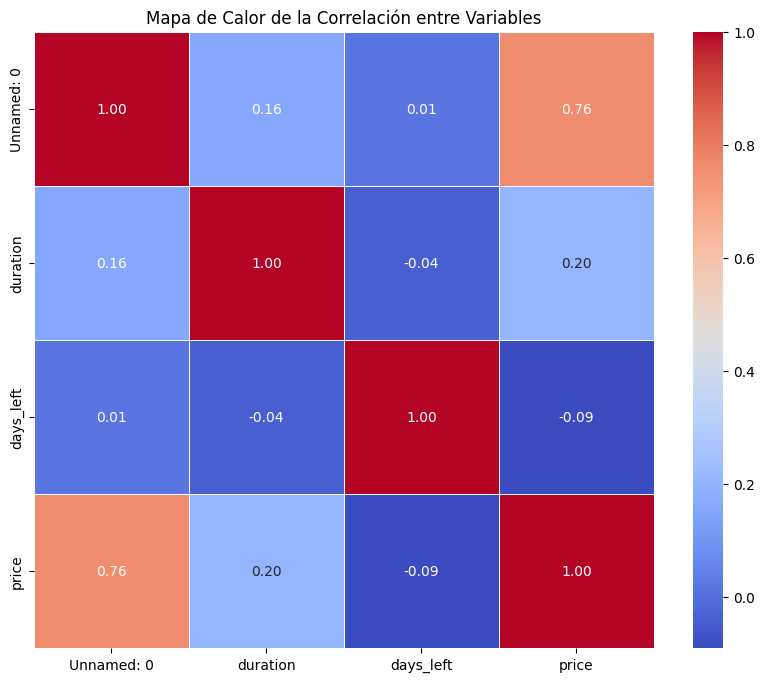

In [7]:
df = train_df.dropna()

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Mapa de Calor de la Correlación entre Variables')

plt.show()


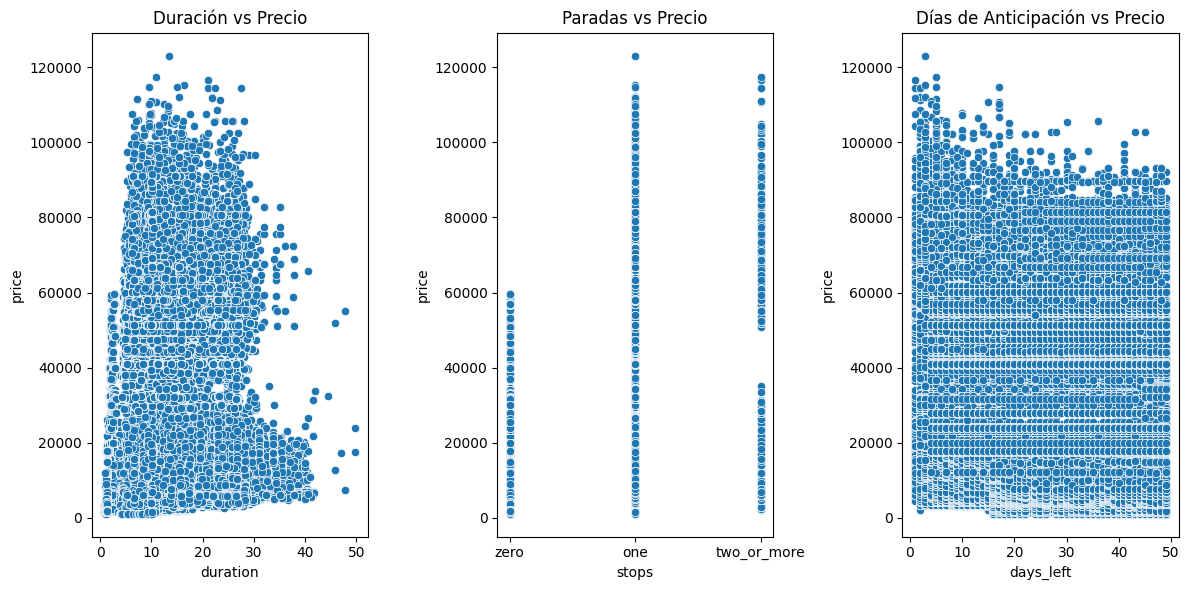

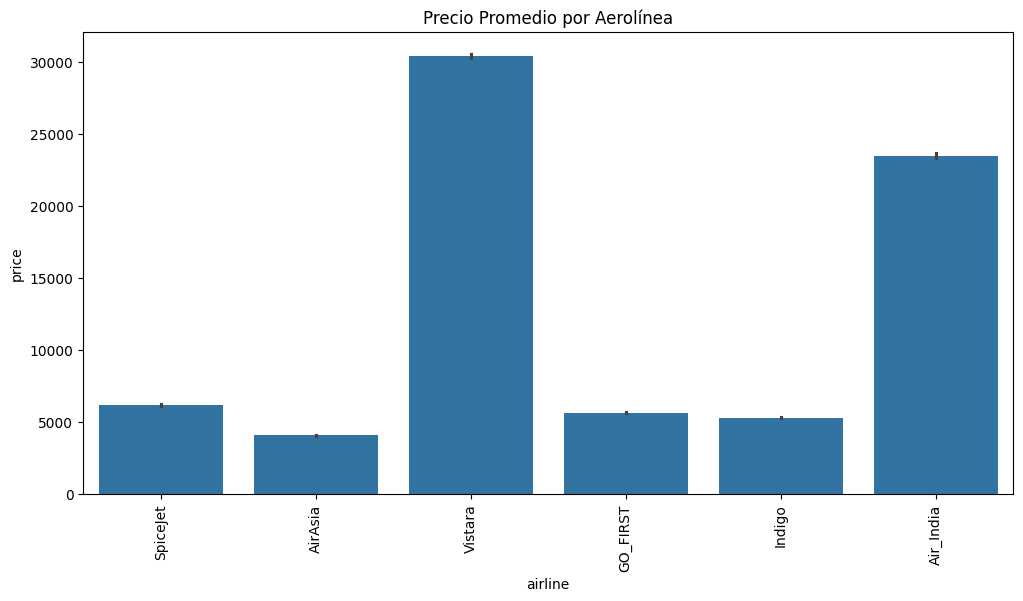

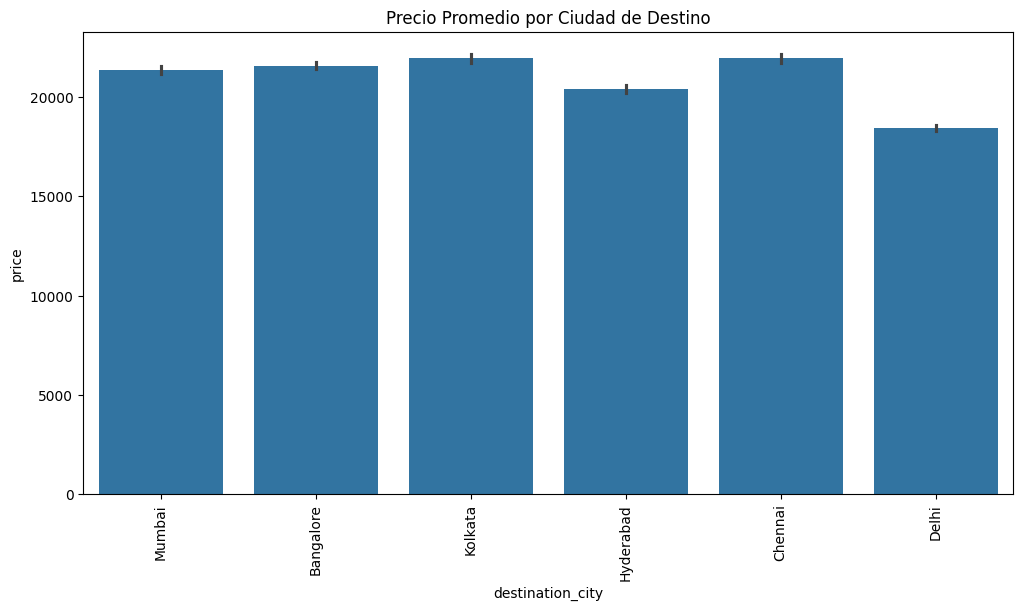

In [5]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x=df['duration'], y=df['price'])
plt.title('Duración vs Precio')

plt.subplot(1, 3, 2)
sns.scatterplot(x=df['stops'], y=df['price'])
plt.title('Paradas vs Precio')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df['days_left'], y=df['price'])
plt.title('Días de Anticipación vs Precio')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='airline', y='price', data=df)
plt.title('Precio Promedio por Aerolínea')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='destination_city', y='price', data=df)
plt.title('Precio Promedio por Ciudad de Destino')
plt.xticks(rotation=90)
plt.show()

# **SELECCIONAR X E Y**

In [5]:
X = df[['airline', 'source_city', 'destination_city', 'departure_time', 'stops', 'arrival_time', 'class', 'duration', 'days_left']]
y = df['price']

# **CODIFICACIÓN DE VARIABLES CATEGÓRICAS**

In [6]:
X_encoded = pd.get_dummies(X, columns=['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'class', 'stops'], drop_first=True)


# **REGRESIÓN LINEAL**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

y_pred = modelo_lineal.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


print(f"(R^2): {r2}")

(R^2): 0.9113048651706634


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# **RANDOM FOREST**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)


mae_rf = mean_absolute_error(y_test, y_pred_rf)

rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

r2_rf = r2_score(y_test, y_pred_rf)


print(f"(R^2): {r2_rf}")

(R^2): 0.9847835415707522


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# **KNN**

In [9]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

k_values = [3, 5, 7, 9, 11, 15]
results = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    y_pred_knn = knn_model.predict(X_test)

    mae_knn = mean_absolute_error(y_test, y_pred_knn)
    rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
    r2_knn = r2_score(y_test, y_pred_knn)

    results.append({
        'k': k,
        'MAE': mae_knn,
        'RMSE': rmse_knn,
        'R^2': r2_knn
    })

for result in results:
    print('-' * 50)
    print(f" (R^2): {result['R^2']}")



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

--------------------------------------------------
 (R^2): 0.9704872291877414
--------------------------------------------------
 (R^2): 0.9689812511095328
--------------------------------------------------
 (R^2): 0.9674500868659501
--------------------------------------------------
 (R^2): 0.9657994209254316
--------------------------------------------------
 (R^2): 0.9640863619021117
--------------------------------------------------
 (R^2): 0.9610536032623385


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# **PICKLE**

In [10]:
import pickle
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)


with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)


# **PYCARET**

In [11]:
# Instalar PyCaret
!pip install pycaret

import pandas as pd
from pycaret.regression import setup, compare_models

# Cargar el dataset
df = pd.read_csv('/content/Clean_Dataset.csv')
df = df.dropna()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 94.2 MB/s eta 0:00:00
   ━━━━

ImportError: cannot import name 'threadpool_info' from 'sklearn.utils.fixes' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/fixes.py)

Codificación de variables

In [ ]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Crear los LabelEncoders
label_encoder_airline = LabelEncoder()
label_encoder_source = LabelEncoder()
label_encoder_destination = LabelEncoder()
label_encoder_class = LabelEncoder()
label_encoder_stops = LabelEncoder()

# Ajustar los LabelEncoders sin modificar el DataFrame original
df['airline_encoded'] = label_encoder_airline.fit_transform(df['airline'])
df['source_city_encoded'] = label_encoder_source.fit_transform(df['source_city'])
df['destination_city_encoded'] = label_encoder_destination.fit_transform(df['destination_city'])
df['class_encoded'] = label_encoder_class.fit_transform(df['class'])
df['stops_encoded'] = label_encoder_stops.fit_transform(df['stops'])

# Guardar cada LabelEncoder como archivos pickle para usarlos en Gradio
with open('label_encoder_airline.pkl', 'wb') as file:
    pickle.dump(label_encoder_airline, file)

with open('label_encoder_source.pkl', 'wb') as file:
    pickle.dump(label_encoder_source, file)

with open('label_encoder_destination.pkl', 'wb') as file:
    pickle.dump(label_encoder_destination, file)

with open('label_encoder_class.pkl', 'wb') as file:
    pickle.dump(label_encoder_class, file)

with open('label_encoder_stops.pkl', 'wb') as file:
    pickle.dump(label_encoder_stops, file)



In [ ]:
# Configuración de PyCaret para comparación de modelos de regresión
regression_setup = setup(
    data=df,
    target='price',
    session_id=42,  # Semilla para reproducibilidad
    use_gpu=True,   # Acelerar en entornos compatibles
    verbose=False   # Oculta mensajes de confirmación
)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

In [ ]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:41:05
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,850.2486,5011604.8071,2238.3471,0.9903,0.1196,0.0578,113.8820
dt,Decision Tree Regressor,859.0686,8152582.0581,2854.9386,0.9842,0.1525,0.0588,3.1300
knn,K Neighbors Regressor,2151.7909,20136058.5240,4486.2429,0.9609,0.2590,0.1743,29.4450
lr,Linear Regression,4596.0535,48016856.8030,6929.2759,0.9068,0.6034,0.4345,1.2750
lasso,Lasso Regression,4595.4703,48017233.7243,6929.3031,0.9068,0.6039,0.4343,1.7420
ridge,Ridge Regression,4596.1319,48016862.0062,6929.2763,0.9068,0.6034,0.4345,1.1260
lar,Least Angle Regression,4597.0383,48025353.2896,6929.8847,0.9068,0.6050,0.4347,1.1280
llar,Lasso Least Angle Regression,4595.4703,48017233.7239,6929.3031,0.9068,0.6039,0.4343,1.1920
br,Bayesian Ridge,4596.0911,48016859.1168,6929.2761,0.9068,0.6034,0.4345,1.4270
en,Elastic Net,10038.4520,150416934.8917,12264.4321,0.7081,1.0085,1.3260,1.5560


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,850.2486,5011604.8071,2238.3471,0.9903,0.1196,0.0578,113.8820
et,Extra Trees Regressor,867.5056,5608986.0713,2367.9022,0.9891,0.1236,0.0588,79.4170
xgboost,Extreme Gradient Boosting,1563.3551,7811211.8573,2794.4273,0.9848,0.1861,0.1288,3.0800
dt,Decision Tree Regressor,859.0686,8152582.0581,2854.9386,0.9842,0.1525,0.0588,3.1300
lightgbm,Light Gradient Boosting Machine,1913.2881,10624248.3737,3258.9854,0.9794,0.2216,0.1626,3.6370
gbr,Gradient Boosting Regressor,2470.6096,17226590.1651,4150.0294,0.9666,0.2501,0.1925,39.6430
knn,K Neighbors Regressor,2151.7909,20136058.5240,4486.2429,0.9609,0.2590,0.1743,29.4450
ada,AdaBoost Regressor,4522.7441,41767685.0067,6447.2499,0.9189,0.4552,0.4719,16.6680
br,Bayesian Ridge,4596.0911,48016859.1168,6929.2761,0.9068,0.6034,0.4345,1.4270
lar,Least Angle Regression,4597.0383,48025353.2896,6929.8847,0.9068,0.6050,0.4347,1.1280


In [ ]:
from pycaret.regression import save_model

# Guardar el mejor modelo
save_model(best_model, 'mejor_modelo_prediccion_precios')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Unnamed: 0', 'airline',
                                              'source_city', 'stops',
                                              'destination_city', 'class',
                                              'duration', 'days_left'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['flight', 'departure_time',
                                              'arrival_time'],
                                     transformer=SimpleImputer(strategy='mo...
                                     transformer=OneHotEncoder(cols=['departure_time',
                                                                     'arrival_time'],
                                                               handle_missing='return_nan',
                                           

# **FINAL**

In [2]:
!pip install gradio -q -U
import pickle
import gradio as gr
import pandas as pd

with open('random_forest_model.pkl', 'rb') as file:
    modelo_cargado = pickle.load(file)

aerolineas = ["SpiceJet", "IndiGo", "Air India", "GoAir", "Vistara", "AirAsia"]
ciudades_origen = ["Mumbai", "Delhi", "Bangalore", "Kolkata", "Hyderabad", "Chennai"]
ciudades_destino = ["Mumbai", "Delhi", "Bangalore", "Kolkata", "Hyderabad", "Chennai"]
clases = ["Economy", "Business"]
escalas = ["non-stop", "1 stop", "2+ stops"]

# Función de predicción
def predecir_precio(aerolinea, ciudad_origen, ciudad_destino, hora_salida, hora_llegada, clase, escalas, dias_restantes):
    entrada = pd.DataFrame([[aerolinea, ciudad_origen, ciudad_destino, hora_salida, escalas, hora_llegada, clase, dias_restantes]],
                           columns=['airline', 'source_city', 'destination_city', 'departure_time', 'stops', 'arrival_time', 'class', 'days_left'])

    entrada_encoded = pd.get_dummies(entrada, columns=['airline', 'source_city', 'destination_city', 'stops', 'class'])

    for col in modelo_cargado.feature_names_in_:
        if col not in entrada_encoded.columns:
            entrada_encoded[col] = 0

    entrada_encoded = entrada_encoded[modelo_cargado.feature_names_in_]

    precio_estimado = modelo_cargado.predict(entrada_encoded)[0]
    return f'El precio estimado del vuelo es: ${precio_estimado:.2f}'

interfaz = gr.Interface(
    fn=predecir_precio,
    inputs=[
        gr.Dropdown(choices=aerolineas, label="Aerolínea"),
        gr.Dropdown(choices=ciudades_origen, label="Ciudad de Origen"),
        gr.Dropdown(choices=ciudades_destino, label="Ciudad de Destino"),
        gr.Number(label="Hora de Salida (en formato 24h)"),
        gr.Number(label="Hora de Llegada (en formato 24h)"),
        gr.Dropdown(choices=clases, label="Clase"),
        gr.Dropdown(choices=escalas, label="Número de Escalas"),
        gr.Number(label="Días Restantes para el Vuelo")
    ],
    outputs=gr.Textbox(label="Precio Estimado"),
    title="Predicción de Precios de Vuelos",
    description="Introduce los detalles del vuelo para obtener el precio estimado."
)

interfaz.launch()




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.5.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.5.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://24046e0ddecf0885c9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
